# MNIST Classification Using Neural Networks

**This .ipynb file should be opened with Colab Notebook developed by Google: https://colab.research.google.com/**

In addition, we need to install Python dependecies **tensorflow, keras** for deep learning using commands
- pip install tensorflow
- pip install keras


## Enabling and testing the GPU

**GPUs can process data several orders of magnitude faster than a CPU due to massive parallelism, although GPUs are not as versatile as CPUs**

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

ModuleNotFoundError: No module named 'tensorflow'

**Observe TensorFlow speedup on GPU relative to CPU**

This example constructs a typical convolutional layer over a
random image and manually places the resulting ops on either the CPU or the GPU to compare execution speed.

In [3]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch size x height x width x channel).')
print('\n CPU time (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('\n GPU time (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('\n GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

ModuleNotFoundError: No module named 'tensorflow'

## Classify MNIST data using One-Hidden-layer Networks

Load MNIST dataset from Keras and Preprocess

In [4]:
# Plot ad hoc mnist instances
from keras.datasets import mnist

ModuleNotFoundError: No module named 'keras'

In [5]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [6]:
print(X_train.shape), print(y_train.shape)

NameError: name 'X_train' is not defined

In [7]:
print(X_test.shape), print(y_test.shape)

NameError: name 'X_test' is not defined

Plot 4 images as gray scale

NameError: name 'X_train' is not defined

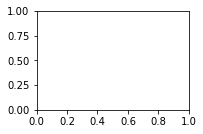

In [8]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Flatten 28x28 images to a 784 vector for each image

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

Normalize inputs from 0-255 to 0-1

In [0]:
X_tr = X_train / 255
X_te = X_test / 255

Encode one-hot labels which are 10-D vectors, e.g., 
- digit 0 -> label (1,0,0,...,0)
- digit 1 -> label (0,1,0,...,0)
- digit 2 -> label (0,0,1,...,0)
- ...
- digit 9 -> label (0,0,0,...,1)

In [0]:
from keras.utils import np_utils
y_tr = np_utils.to_categorical(y_train,10)
y_te = np_utils.to_categorical(y_test,10)
num_classes = y_te.shape[1]

print(y_tr.shape)

(60000, 10)


**Train One-Hidden-Layer Network**

In [0]:
from keras.models import Sequential
from keras.layers import Dense

**Define One-Hidden-Layer Model**

Create a new instance of a model object using sequential model API. Then add two Dense linear layers, one ReLU activation layer, and Softmax output layer to the architecture discussed earlier in slides. Finally, compile the model with the ‘categorical_crossentropy’ loss function and ‘adam’ optimization algorithm. When compiling the model, add metrics=[‘accuracy’] to calculate the accuracy of the model.

In [0]:
def one_hidden_layer_model():
  # create model
  model = Sequential()
  # Fully-connected Layer with ReLU activation
  model.add(Dense(num_pixels, activation='relu'))
  # Fully-connected Layer with Softmax output
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model with corss entropy loss and Adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Build, train, and evaluate the model

In [0]:
# build the model
model = one_hidden_layer_model()
# Fit the model
model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=15, batch_size=200, verbose=2)
# Final evaluation of the model on test data
scores = model.evaluate(X_te, y_te, verbose=0)
print("\n Testing/Validation Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 1s - loss: 0.2810 - accuracy: 0.9195 - val_loss: 0.1356 - val_accuracy: 0.9592
Epoch 2/15
 - 1s - loss: 0.1113 - accuracy: 0.9679 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 3/15
 - 1s - loss: 0.0725 - accuracy: 0.9790 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 4/15
 - 1s - loss: 0.0517 - accuracy: 0.9851 - val_loss: 0.0747 - val_accuracy: 0.9769
Epoch 5/15
 - 1s - loss: 0.0359 - accuracy: 0.9900 - val_loss: 0.0674 - val_accuracy: 0.9804
Epoch 6/15
 - 1s - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.0617 - val_accuracy: 0.9813
Epoch 7/15
 - 1s - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0610 - val_accuracy: 0.9811
Epoch 8/15
 - 1s - loss: 0.0143 - accuracy: 0.9968 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 9/15
 - 1s - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 10/15
 - 1s - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0606 - val_accuracy: 0.9831
Epoch 11/15
 - 1s -

## MNIST Classification with Convolutional Neural Network LeNet-5

Reload the image and reshape images into 4-D array

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Set numeric type to float32 from uint8
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize value to [0, 1]
X_train /= 255
X_test /= 255

# Transform lables to one-hot encoding
y_tr = np_utils.to_categorical(y_train, 10)
y_te = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
X_tr = X_train.reshape(X_train.shape[0], 28,28,1)
X_te = X_test.reshape(X_test.shape[0], 28,28,1)


Create a new instance of a model object using sequential model API. Then add layers to the neural network as per LeNet-5 architecture discussed earlier. Finally, compile the model with the ‘categorical_crossentropy’ loss function and SGD algorithm combined with Nesterov momentum. When compiling the model, add metrics=[‘accuracy’] to calculate the accuracy of the model.

We made the following changes on the original LeNet-5 by LeCun et al.:

- use the original data dimensions 28 X 28 pixels instead of 32 X 32 pixels, that is, no zero paddings to the images
- use ReLU activation instead of tanh

In [0]:
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras import optimizers

def lenet5():
  model = Sequential()
  # C1 Convolutional Layer
  model.add(Conv2D(filters = 6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(28,28,1)))
  # S2 Pooling Layer
  model.add(MaxPool2D(pool_size=(2, 2), strides=1))

  # C3 Convolutional Layer
  model.add(Conv2D(filters = 16, kernel_size=(5, 5), strides=1, activation='relu'))

  # S4 Pooling Layer
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))

  # C5 Fully Connected Convolutional Layer
  model.add(Conv2D(filters = 120, kernel_size=(5, 5), strides=1, activation='relu'))
  #Flatten the CNN output so that we can connect it with fully-connected layers
  model.add(Flatten())
  
  # FC6 Fully Connected Layer
  model.add(Dense(84, activation='relu'))

  # Output Layer with softmax activation
  model.add(Dense(10, activation='softmax'))

  # Compile the model
  # model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr = 0.02, momentum=0.9, nesterov=True), metrics=['accuracy'])
  # model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr = 0.02, momentum=0.0), metrics=['accuracy'])

  # Or, train using Adam algorithm  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  return model

Training and model evaluation

In [0]:
model = lenet5()
hist = model.fit(X_tr, y_tr, epochs=20, batch_size=200, validation_data=(X_te, y_te), verbose=2)
# Final evaluation of the model on test data
scores = model.evaluate(X_te, y_te, verbose=0)
print("\n Testing/Validation Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.2363 - accuracy: 0.9301 - val_loss: 0.0558 - val_accuracy: 0.9813
Epoch 2/20
 - 2s - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0427 - val_accuracy: 0.9860
Epoch 3/20
 - 2s - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.0303 - val_accuracy: 0.9893
Epoch 4/20
 - 2s - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 5/20
 - 2s - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 6/20
 - 2s - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 7/20
 - 2s - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0246 - val_accuracy: 0.9925
Epoch 8/20
 - 2s - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 9/20
 - 2s - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 10/20
 - 2s - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 11/20
 - 2s -

**Visualize the Training Process**

We will visualize the training process by plotting the training accuracy and loss after each epoch

Text(0, 0.5, 'Accuracy')

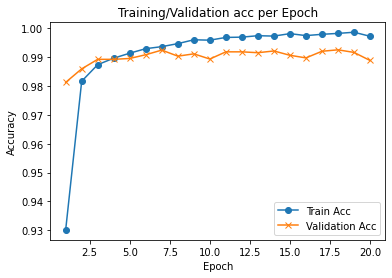

In [0]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Acc', 'Validation Acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Loss')

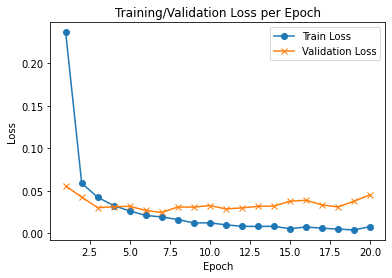

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')